In [23]:
import ffmpeg
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [24]:
os.makedirs('thumbs', exist_ok=True)

In [25]:
stream = ffmpeg.input('input.mp4')
stream = ffmpeg.filter(stream, 'fps', fps=1, round='up')
stream = ffmpeg.output(stream, 'thumbs/frame-%d.jpg')
ffmpeg.run(stream)

(None, None)

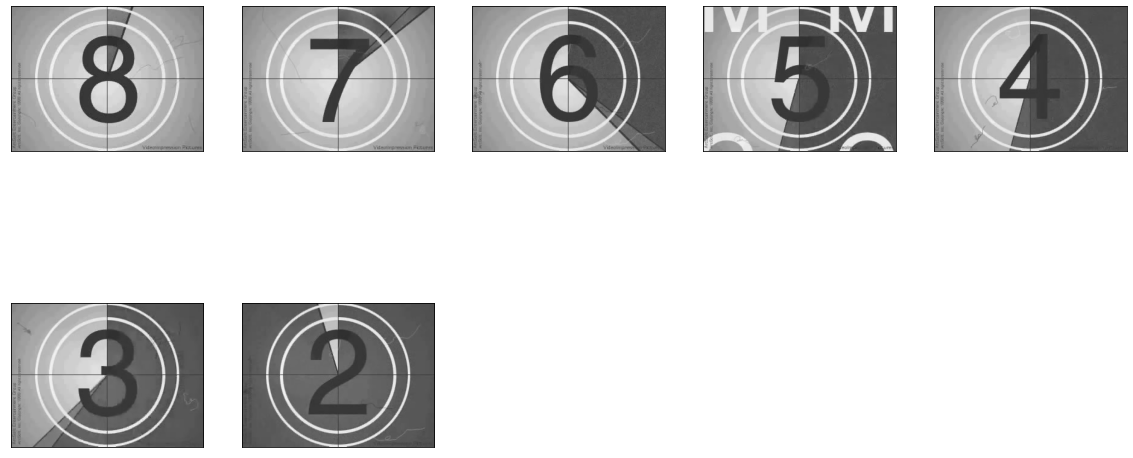

In [26]:
images = []
for img_path in glob.glob('./thumbs/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

# Generate thumbnail for video

In [36]:
time = 1.2
width = 100
out_filename = 'thumbs/thumbnail.png'
(
    ffmpeg
    .input('input.mp4', ss=time)
    .filter('scale', width, -1)
    .output(out_filename, vframes=1)
    .run()
)

(None, None)

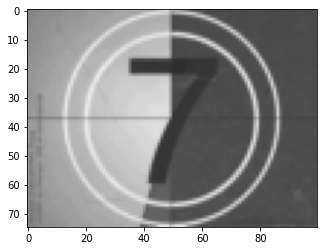

In [37]:
thumb = mpimg.imread(out_filename)
plt.imshow(thumb)